#### Making of a Feed Forward Neural Network
Making the Digit classification model for the MNIST dataset

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784
hidden_size = 100
output_size = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./datasets', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./datasets', train=False, transform=transforms.ToTensor())

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=batch_size)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


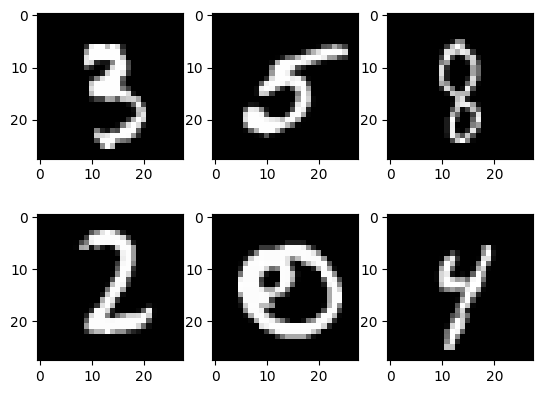

In [6]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [7]:
class DigitClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DigitClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        # since we use the CrossEntropyLoss(), we don't need to apply a softmax function to out output layer
        return out

In [8]:
model = DigitClassifier(input_size, hidden_size, output_size)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# The actual training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for index, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (index + 1) % 100 == 0:
            print(f'epoch: {epoch+1}, sample: {index+1}, loss: {loss}')


epoch: 1, sample: 100, loss: 0.5062991976737976
epoch: 1, sample: 200, loss: 0.2903061509132385
epoch: 1, sample: 300, loss: 0.26409396529197693
epoch: 1, sample: 400, loss: 0.32812586426734924
epoch: 1, sample: 500, loss: 0.2684363126754761
epoch: 1, sample: 600, loss: 0.24474529922008514
epoch: 2, sample: 100, loss: 0.3356832265853882
epoch: 2, sample: 200, loss: 0.10936618596315384
epoch: 2, sample: 300, loss: 0.26758873462677
epoch: 2, sample: 400, loss: 0.1759406328201294
epoch: 2, sample: 500, loss: 0.10423041135072708
epoch: 2, sample: 600, loss: 0.07415507733821869


In [11]:
with torch.no_grad():
    n_correct = 0
    n_total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _,predictions = torch.max(outputs, dim=1)
        n_total += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100.0 * (n_correct/ n_total)
    print(f'accuracy: {acc}')

accuracy: 95.35
